When webscraping, its important to have a goal before starting. Otherwise its easy to get lost in the amount of information you have access to.

For this workshop, the goal is to scrape a website called sports-reference and get statistics for the Gators Football team from this website https://www.sports-reference.com/cfb/coaches/billy-napier-1.html

The general outline and plan of webscraping is as follows.

Scraping -> Data in Python -> Storing of data (usually in pandas) -> Visualization/use of data

We'll go over this exact plan to accomplish our goal

First before anything, you should make sure you have all the packages your going to use downloaded and then imported

In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install lxml

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

Before you actually start webscraping its important to check the robots.txt file. In here the website outlines their allowance of scraping, not all websites will allow it and those that do, only allow a certain amount of requests a minute.

https://www.basketball-reference.com/robots.txt

For this website, we can only send 1 scrape request every 3 seconds. So we have to use the time module to wait between requests

In [ ]:
url = "https://www.sports-reference.com/cfb/coaches/billy-napier-1.html"
response = requests.get(url)

print(response.status_code)

200


A status code of 200 means that your request was successful, its important to check this to make sure everything is working as you expect

In [ ]:
soup = BeautifulSoup(response.text, "lxml") #lxml is an html parser, but needs to be downloaded. Can also use html.parser
type(soup)

bs4.BeautifulSoup

Its easy to print the title of a website

In [ ]:
title = soup.title
print(title)

<title>Billy Napier College Coaching Records, Awards and Leaderboards  | College Football at Sports-Reference.com</title>


You can also get the entire webpage and print it out to make sure its the correct one

In [ ]:
text = soup.get_text()
print(soup.text)










Billy Napier College Coaching Records, Awards and Leaderboards  | College Football at Sports-Reference.com































































































 Sports Reference ®
Baseball
Football (college)
Basketball (college)
Hockey
Soccer
Blog
Stathead ®
Immaculate Grid ®
Questions or Comments?
Welcome  · Your Account
Logout
Ad-Free Login
Create Account


MENU

Players
Schools
Years
Leaders
CFB Scores
Bowls
Stathead
Newsletter
Full Site Menu Below

You are here: CFB Home Page  > Coaches  > Billy Napier
Welcome  · Your Account
Logout
Ad-Free Login
Create Account






















Billy Napier






Career Record: 8 Years, 61-35, .635 Win% (at major schools)
Bowl Record: 5 Games, 3-2, .600 Win% (at major schools)
More bio, uniform, draft info




2x Sun Belt COY



Become a Stathead & surf this site ad-free.















College Football Coaches 
Billy Napier Overview 
More

Other SR Sites


 














Coaching Record






find_all() is BeautifulSoup function used to extract html tags from a website.

Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

For this example since we want to get billys record every year and overall record, so we want to scrape the entire table

The best way to find the html structure of a website is to use inspect element on the website.

When you inspect on the website, you can view the html and find out that the table has id="coaches"

In [ ]:
table = soup.find('table', id="coaches")
print(table)

<table class="sortable stats_table" data-cols-to-freeze="1,2" id="coaches">
<caption>Coaching Record Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Year" class="poptip sort_default_asc right" data-stat="year_id" scope="col">Year</th>
<th aria-label="School" class="poptip sort_default_asc left" data-stat="school_name" data-tip="School Name" scope="col">School</th>
<th aria-label="Games" class="poptip right" data-stat="g" data-tip="Games" scope="col">G</th>
<th aria-label="Wins" class="poptip right" data-stat="wins" data-tip="Wins" scope="col">W</th>
<th aria-label="Losses" class="poptip right" data-stat="losses" data-tip="Losses" scope="col">L</th>
<th aria-label="Ties" class="poptip right" data-stat="ties" data-tip="Ties" scope="col">T</th>
<th aria-label="Win-Loss Percentage" class="poptip right" data-filter="1" data-name="Win-Loss Percentage" data-stat="win_loss_pct" data-tip="Win-

We want to bring over the entire table to a dataframe in python, but when isolating rows there is still html tags. So we have to strip them before appending to our list of data.

In [ ]:
rows = table.find_all('tr')

data = []
for row in rows:
  row_data = row.find_all(['td', 'th'])
  row_text = [cell.text.strip() for cell in row_data]
  data.append(row_text)
print(row_data)
print(row_text)

[<th class="right" data-stat="year_id" scope="row">4 Yrs</th>, <td class="left" data-stat="school_name"><a href="/cfb/schools/florida/">Florida</a></td>, <td class="right" data-stat="g">44</td>, <td class="right" data-stat="wins">21</td>, <td class="right" data-stat="losses">23</td>, <td class="right iz" data-stat="ties">0</td>, <td class="right" data-stat="win_loss_pct">.477</td>, <td class="right" data-stat="srs">7.47</td>, <td class="right" data-stat="sos">7.54</td>, <td class="center iz" data-stat="rank_pre"></td>, <td class="center iz" data-stat="rank_min"></td>, <td class="center iz" data-stat="rank_final"></td>, <td class="left" data-stat="bowl_name">1-1</td>, <td class="left iz" data-stat="notes"></td>]
['4 Yrs', 'Florida', '44', '21', '23', '0', '.477', '7.47', '7.54', '', '', '', '1-1', '']


The first rows is typically going to be headers, so its important to seperate them from the actual data

In [ ]:
headers = data[0]
body = data[1:]

Now that we have a list with our information, the next step is to convert it into a dataframe

In [ ]:
df = pd.DataFrame(body, columns=headers)
df

,Year,School,G,W,L,T,Pct,SRS,SOS,AP Pre,AP High,AP Post,Bowl,Notes
0,2018,Louisiana,14,7,7,0,.500,-2.46,-2.32,,,,Cure Bowl-L,
1,2019,Louisiana,14,11,3,0,.786,8.68,-3.25,,,,LendingTree Bowl-W,
2,2020,Louisiana,11,10,1,0,.909,7.75,-2.25,,15,15,First Responder Bowl-W,
3,2021,Louisiana,13,12,1,0,.923,6.32,-4.82,23,16,16,,
4,2022,Florida,13,6,7,0,.462,6.92,7.00,,12,,Las Vegas Bowl-L,
5,2023,Florida,12,5,7,0,.417,3.31,4.31,,22,,,
6,2024,Florida,13,8,5,0,.615,10.75,6.44,,,,Union Home Mortgage Gasparilla Bowl-W,
7,2025,Florida,6,2,4,0,.333,8.91,12.41,15,13,,,
8,8 Yrs,Overall,96,61,35,0,.635,6.27,2.19,,,,3-2,
9,4 Yrs,Louisiana,52,40,12,0,.769,5.07,-3.16,,,,2-1,


Notice that we have spots with no data, because the original table had nothing there

In [ ]:
df['AP High']

,AP High
0,
1,
2,15
3,16
4,12
5,22
6,
7,13
8,
9,


Its important to go over your data and clean it even after scraping it

Now were gonna try to scrape using a loop to get multiple urls. For this we'll scrape information on each gators football team since 2000

Notice that when looking at the inspect element of these new pages, the specific div we want doesn't have an id. So we go to the div above that based on its id then we need to find the 2nd div under

In [ ]:
years = range(1990, 2025)
data2 = []
for year in years:
  try:
    url = f"https://www.sports-reference.com/cfb/schools/florida/{year}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")
    print(f"Scraping data for Florida Gators football in {year}")
    # time.sleep(3) #important to wait 3 seconds between searches for this website

    meta_div = soup.find('div', id='meta')
    div = meta_div.find_all('div')[1]
    stats = div.find_all('p') #find all the stats you want

    year_data = []
    headers = []
    year_data.append(year)
    for stat in stats:
      text = stat.text
      key, value = text.split(':', 1) #since each stat has a preceder like "Record: ". We want to seperate from that
      if key == "Rank" or key == "Bowl Game": #Not every team gets ranked and makes a bowl game, so I won't include it right now
        continue
      if not data2:
        headers.append(key.strip()) #Only add headers when we don't already have them
      year_data.append(value.strip()) #Append each data point to the data for that year
    if headers:
      headers.insert(0, "Year")
      data2.append(headers) #Append headers if we don't already have them
    data2.append(year_data) #Append the data from that year
  except Exception as e:
    print(f"Error scraping data for {year}: {e}")
    continue


Scraping data for Florida Gators football in 1990
Scraping data for Florida Gators football in 1991
Scraping data for Florida Gators football in 1992
Scraping data for Florida Gators football in 1993
Scraping data for Florida Gators football in 1994
Scraping data for Florida Gators football in 1995
Error scraping data for 1995: 'NoneType' object has no attribute 'find_all'
Scraping data for Florida Gators football in 1996
Error scraping data for 1996: 'NoneType' object has no attribute 'find_all'
Scraping data for Florida Gators football in 1997
Error scraping data for 1997: 'NoneType' object has no attribute 'find_all'
Scraping data for Florida Gators football in 1998
Error scraping data for 1998: 'NoneType' object has no attribute 'find_all'
Scraping data for Florida Gators football in 1999
Error scraping data for 1999: 'NoneType' object has no attribute 'find_all'
Scraping data for Florida Gators football in 2000
Error scraping data for 2000: 'NoneType' object has no attribute 'find

In [ ]:
data2

[['Year',
  'Record',
  'Conference',
  'Conference Record',
  'Coach',
  'Points For',
  'Points/G',
  'Points Against',
  'Opp Pts/G',
  'SRS',
  'SOS'],
 [2000,
  '10-3 (14th of 116) (Schedule & Results)',
  'SEC (East Division)',
  '7-1',
  'Steve Spurrier (10-3)',
  '448',
  '37.3 (10th of 116)',
  '236',
  '19.7 (30th of 116)',
  '17.61 (6th of 116)',
  '6.23 (10th of 116)'],
 [2001,
  '10-2 (10th of 117) (Schedule & Results)',
  'SEC (East Division)',
  '6-2',
  'Steve Spurrier (10-2)',
  '482',
  '43.8 (2nd of 117)',
  '155',
  '14.1 (5th of 117)',
  '23.38 (2nd of 117)',
  '5.38 (19th of 117)'],
 [2002,
  '8-5 (36th of 117) (Schedule & Results)',
  'SEC (East Division)',
  '6-2',
  'Ron Zook (8-5)',
  '336',
  '25.8 (70th of 117)',
  '279',
  '21.5 (31st of 117)',
  '8.58 (29th of 117)',
  '5.97 (7th of 117)'],
 [2003,
  '8-5 (38th of 117) (Schedule & Results)',
  'SEC (East Division)',
  '6-2',
  'Ron Zook (8-5)',
  '390',
  '30.0 (34th of 117)',
  '271',
  '20.8 (28th of 117

In [ ]:
df2 = pd.DataFrame(data2[1:], columns=data2[0])
df2

,Year,Record,Conference,Conference Record,Coach,Points For,Points/G,Points Against,Opp Pts/G,SRS,SOS
0,2000,10-3 (14th of 116) (Schedule & Results),SEC (East Division),7-1,Steve Spurrier (10-3),448,37.3 (10th of 116),236,19.7 (30th of 116),17.61 (6th of 116),6.23 (10th of 116)
1,2001,10-2 (10th of 117) (Schedule & Results),SEC (East Division),6-2,Steve Spurrier (10-2),482,43.8 (2nd of 117),155,14.1 (5th of 117),23.38 (2nd of 117),5.38 (19th of 117)
2,2002,8-5 (36th of 117) (Schedule & Results),SEC (East Division),6-2,Ron Zook (8-5),336,25.8 (70th of 117),279,21.5 (31st of 117),8.58 (29th of 117),5.97 (7th of 117)
3,2003,8-5 (38th of 117) (Schedule & Results),SEC (East Division),6-2,Ron Zook (8-5),390,30.0 (34th of 117),271,20.8 (28th of 117),10.67 (21st of 117),6.75 (5th of 117)
4,2004,7-5 (37th of 120) (Schedule & Results),SEC (East Division),4-4,"Ron Zook (7-4), Charlie Strong (0-1)",382,31.8 (19th of 120),253,21.1 (32nd of 120),9.58 (26th of 120),2.67 (46th of 120)
5,2005,9-3 (14th of 119) (Schedule & Results),SEC (East Division),5-3,Urban Meyer (9-3),343,28.6 (49th of 119),226,18.8 (18th of 119),12.32 (15th of 119),3.82 (33rd of 119)
6,2006,13-1 (2nd of 119) (Schedule & Results),SEC (East Division),7-1,Urban Meyer (13-1),416,29.7 (24th of 119),189,13.5 (6th of 119),19.66 (3rd of 119),6.95 (4th of 119)
7,2007,9-4 (20th of 120) (Schedule & Results),SEC (East Division),5-3,Urban Meyer (9-4),552,42.5 (3rd of 120),331,25.5 (47th of 120),18.06 (4th of 120),6.83 (4th of 120)
8,2008,13-1 (2nd of 120) (Schedule & Results),SEC (East Division),7-1,Urban Meyer (13-1),611,43.6 (4th of 120),181,12.9 (4th of 120),25.37 (1st of 120),5.58 (5th of 120)
9,2009,13-1 (3rd of 120) (Schedule & Results),SEC (East Division),8-0,Urban Meyer (13-1),502,35.9 (10th of 120),174,12.4 (4th of 120),21.15 (2nd of 120),5.43 (8th of 120)


Some of the data is still rough and has more words than I want

In [ ]:
df2['Record'] = df2['Record'].str.split('(').str[0].str.strip()
df2['Conference'] = df2['Conference'].str.split('(').str[0].str.strip()
df2['Coach'] = df2['Coach'].str.split('(').str[0].str.strip()
df2['SRS'] = df2['SRS'].str.split('(').str[0].str.strip()
df2['SRS'] = pd.to_numeric(df2['SRS'], errors='coerce')
df2

,Year,Record,Conference,Conference Record,Coach,Points For,Points/G,Points Against,Opp Pts/G,SRS,SOS
0,2000,10-3,SEC,7-1,Steve Spurrier,448,37.3 (10th of 116),236,19.7 (30th of 116),17.61,6.23 (10th of 116)
1,2001,10-2,SEC,6-2,Steve Spurrier,482,43.8 (2nd of 117),155,14.1 (5th of 117),23.38,5.38 (19th of 117)
2,2002,8-5,SEC,6-2,Ron Zook,336,25.8 (70th of 117),279,21.5 (31st of 117),8.58,5.97 (7th of 117)
3,2003,8-5,SEC,6-2,Ron Zook,390,30.0 (34th of 117),271,20.8 (28th of 117),10.67,6.75 (5th of 117)
4,2004,7-5,SEC,4-4,Ron Zook,382,31.8 (19th of 120),253,21.1 (32nd of 120),9.58,2.67 (46th of 120)
5,2005,9-3,SEC,5-3,Urban Meyer,343,28.6 (49th of 119),226,18.8 (18th of 119),12.32,3.82 (33rd of 119)
6,2006,13-1,SEC,7-1,Urban Meyer,416,29.7 (24th of 119),189,13.5 (6th of 119),19.66,6.95 (4th of 119)
7,2007,9-4,SEC,5-3,Urban Meyer,552,42.5 (3rd of 120),331,25.5 (47th of 120),18.06,6.83 (4th of 120)
8,2008,13-1,SEC,7-1,Urban Meyer,611,43.6 (4th of 120),181,12.9 (4th of 120),25.37,5.58 (5th of 120)
9,2009,13-1,SEC,8-0,Urban Meyer,502,35.9 (10th of 120),174,12.4 (4th of 120),21.15,5.43 (8th of 120)


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

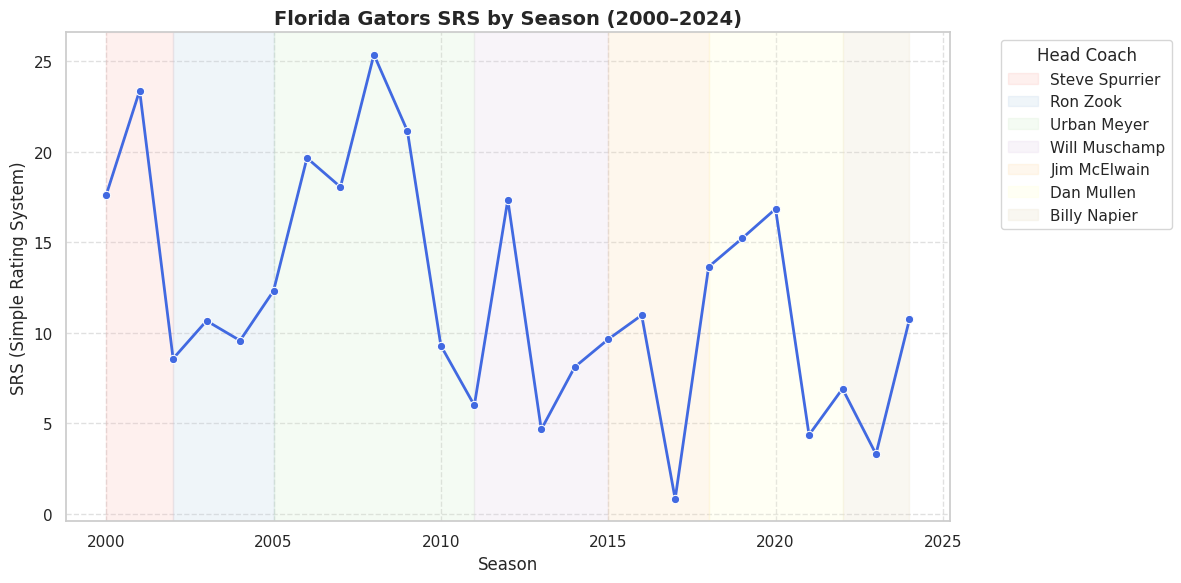

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x="Year", y="SRS", marker="o", linewidth=2, color="royalblue")

prev_coach = None
start_year = df2['Year'].iloc[0]
colors = plt.cm.Pastel1(range(10))
coach_idx = 0

for i, row in df2.iterrows():
    coach = row["Coach"]
    if coach != prev_coach and prev_coach is not None:
        plt.axvspan(start_year, row["Year"], alpha=0.2, color=colors[coach_idx % 10], label=prev_coach)
        start_year = row["Year"]
        coach_idx += 1
    prev_coach = coach
plt.axvspan(start_year, df2['Year'].iloc[-1], alpha=0.2, color=colors[coach_idx % 10], label=prev_coach)

plt.title("Florida Gators SRS by Season (2000–2024)", fontsize=14, weight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("SRS (Simple Rating System)", fontsize=12)
plt.legend(title="Head Coach", bbox_to_anchor=(1.05, 1), loc='upper left')  # ADD THIS LINE
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Try it yourself

https://books.toscrape.com/catalogue/page-1.html

Try to scrape every book title from the first page of this website.

In [ ]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
new = soup.find('ol', class_='row')

books_list = new.find_all('li')
book_titles = []
for book in books_list:
  title = book.find('h3').find('a').get('title')
  book_titles.append(title)
print(book_titles)

['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]


Selenium is another module that is useful in webscraping. Its useful when you need to click buttons or scroll. Need to download chromedriver before using it

In [ ]:
!pip install selenium
!pip install webdriver-manager
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin #downloads chromedriver to the colab computer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 12.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
chrome_options = Options()
chrome_options.add_argument('--headless') #no browser window opens
chrome_options.add_argument('--no-sandbox') #remove security so it can run in colab
chrome_options.add_argument('--disable-dev-shm-usage') #prevent crashing
driver = webdriver.Chrome(options=chrome_options)

driver.get('https://books.toscrape.com/catalogue/page-1.html')


book_names = []
driver.implicitly_wait(2) #wait for two seconds for something to load before throwing an error
next_button = driver.find_element(By.XPATH, "/html/body/div/div/div/div/section/div[2]/div/ul/li[2]/a") #find next button
next_button.click() #go to the next page

parent_node = driver.find_element(By.XPATH, "/html/body/div/div/div/div/section/div[2]/ol")
elements = parent_node.find_elements(By.TAG_NAME, "a") #find all the books

for element in elements:
  book_names.append(element.get_attribute("title")) #get the title of the books

driver.quit() #important to close driver after opening it

In [ ]:
book_names = [item for item in book_names if item.strip()]
for book in book_names:
  print(book)

In Her Wake
How Music Works
Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More
Chase Me (Paris Nights #2)
Black Dust
Birdsong: A Story in Pictures
America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana
Aladdin and His Wonderful Lamp
Worlds Elsewhere: Journeys Around Shakespeare’s Globe
Wall and Piece
The Four Agreements: A Practical Guide to Personal Freedom
The Five Love Languages: How to Express Heartfelt Commitment to Your Mate
The Elephant Tree
The Bear and the Piano
Sophie's World
Penny Maybe
Maude (1883-1993):She Grew Up with the country
In a Dark, Dark Wood
Behind Closed Doors
You can't bury them all: Poems
